In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [246]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [247]:
df.shape

(32560, 15)

In [248]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [249]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [251]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [252]:
df.drop(['Fnlwgt','Capital_gain','Capital_loss'], axis = 1, inplace = True)

In [253]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


EDA

In [254]:
income_count=pd.DataFrame(df['Income'].value_counts())
income_count

,Income
<=50K,24719
>50K,7841


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>]],
      dtype=object)

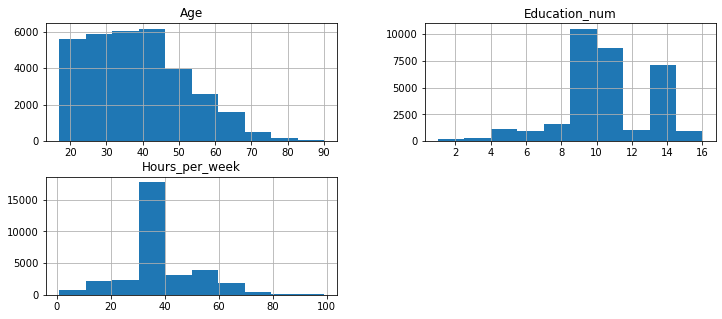

In [255]:
df.hist(figsize=(12,5))

<AxesSubplot:>

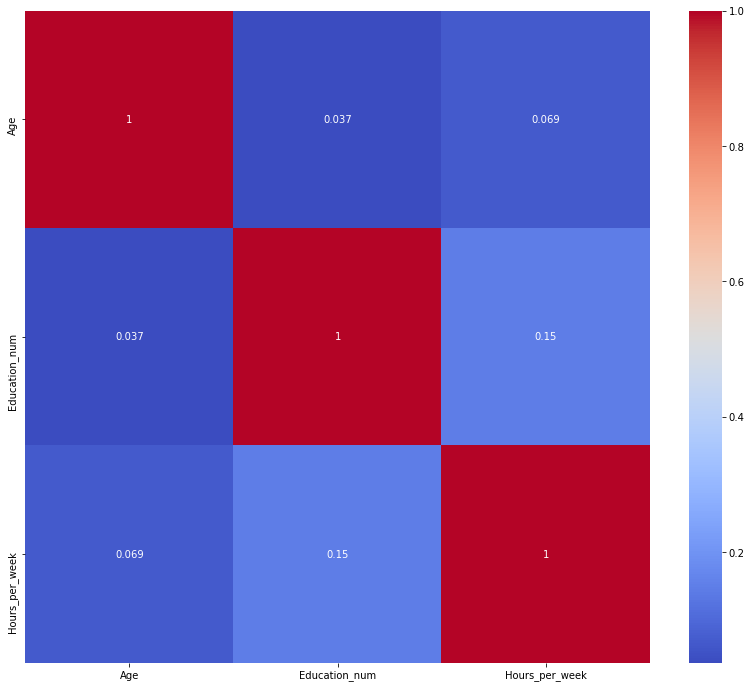

In [256]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence, I'll drop this column later.

I'll now analyse the categorical features using CountPlot.

In [257]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Age', ylabel='count'>

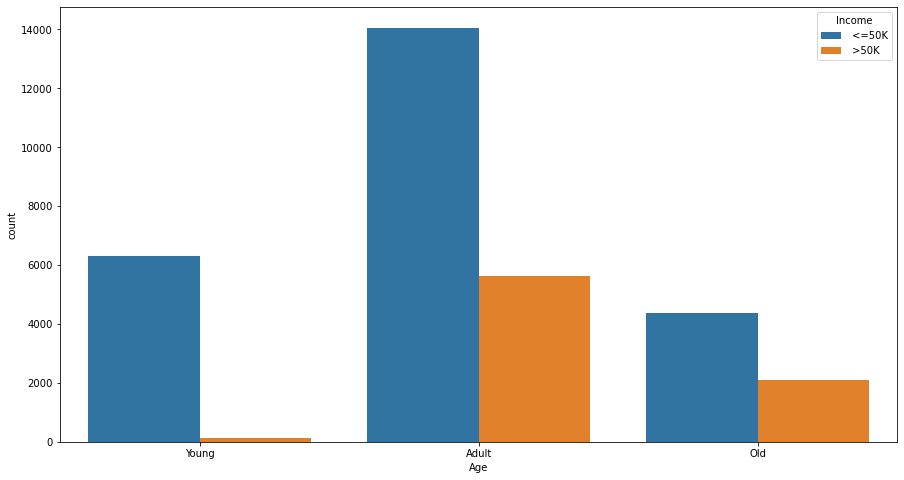

In [258]:
plt.figure(figsize=(15,8),)
sns.countplot(x='Age',hue ='Income',data = df)

It appears that there are relatively less Young people who have an income more than $50K.



There is no use of Fnlwgt so im dropping it

<AxesSubplot:xlabel='Workclass', ylabel='count'>

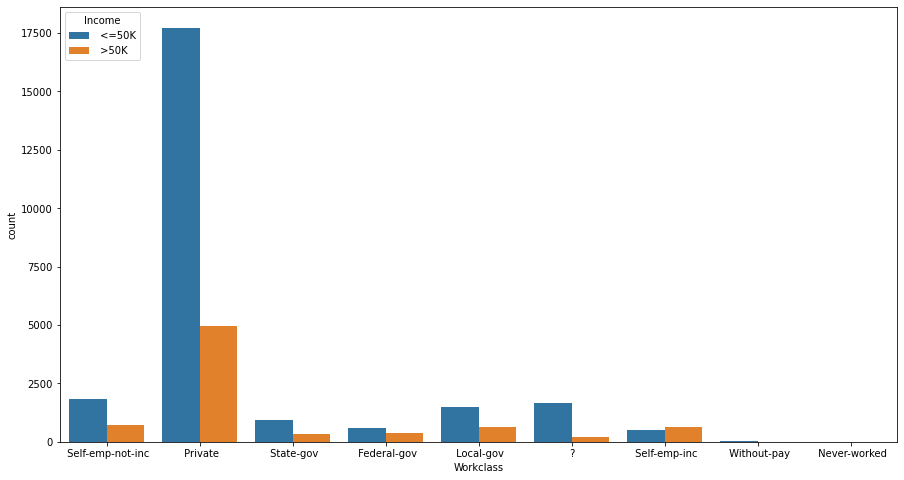

In [259]:
plt.figure(figsize=(15,8),)
sns.countplot(x='Workclass',hue='Income', data = df)

Taking a look at the plot above, I can see that there are Work Class values defined as ? which appears to be error data. As it is very less, I'll simply remove these records

<AxesSubplot:xlabel='Education', ylabel='count'>

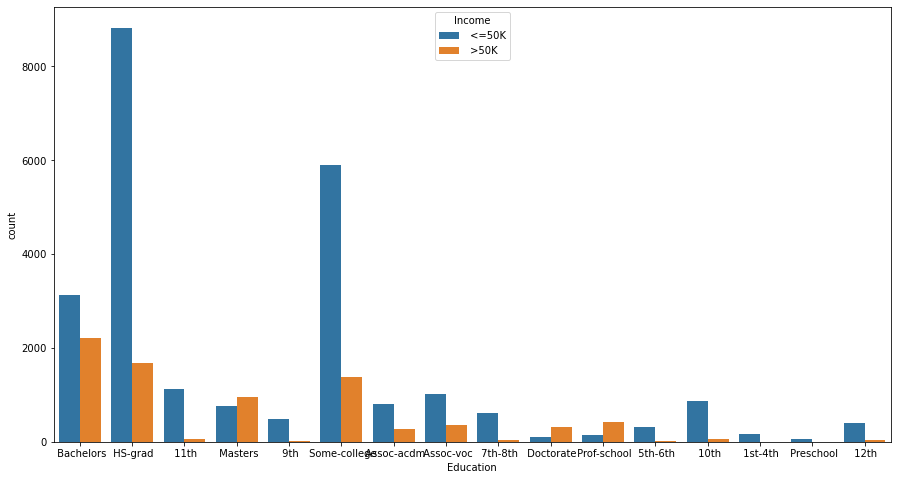

In [260]:
plt.figure(figsize=(15,8),)
sns.countplot(x='Education',hue='Income', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

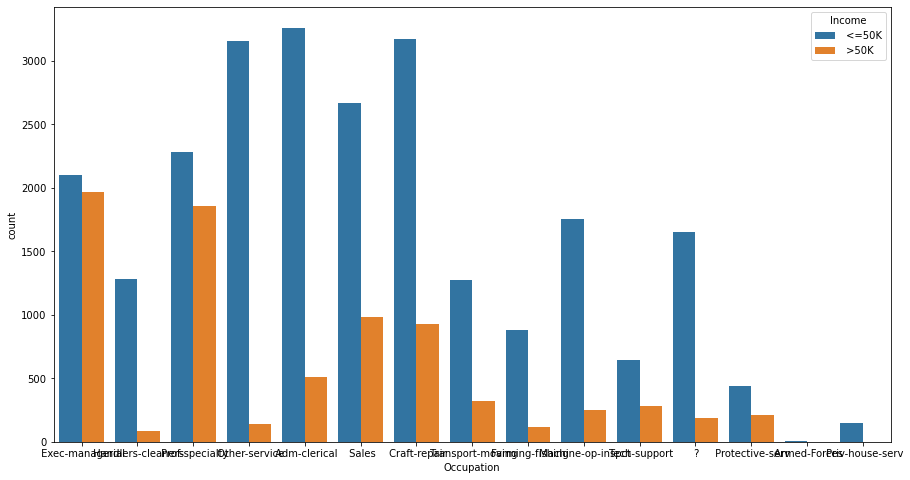

In [261]:
plt.figure(figsize=(15,8),)
sns.countplot(x='Occupation',hue='Income', data = df)

The data has no missing values

<AxesSubplot:xlabel='Race', ylabel='count'>

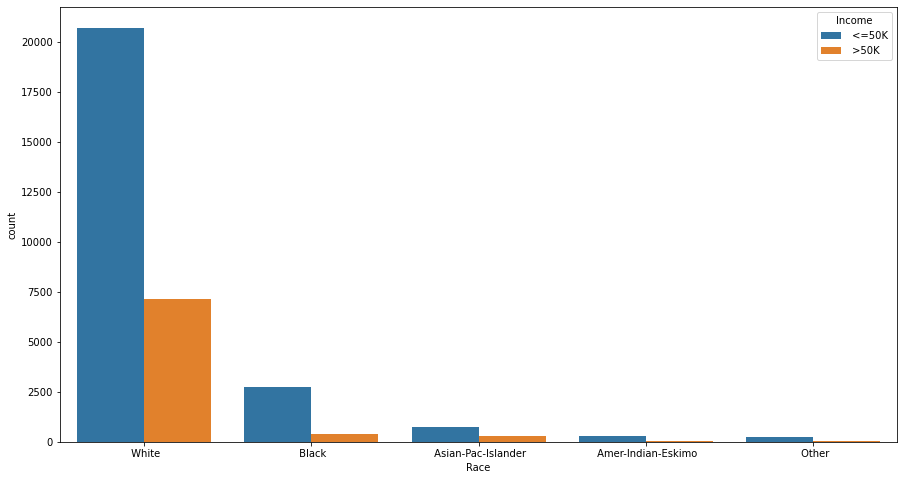

In [262]:
plt.figure(figsize=(15,8),)
sns.countplot(x='Race',hue='Income', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

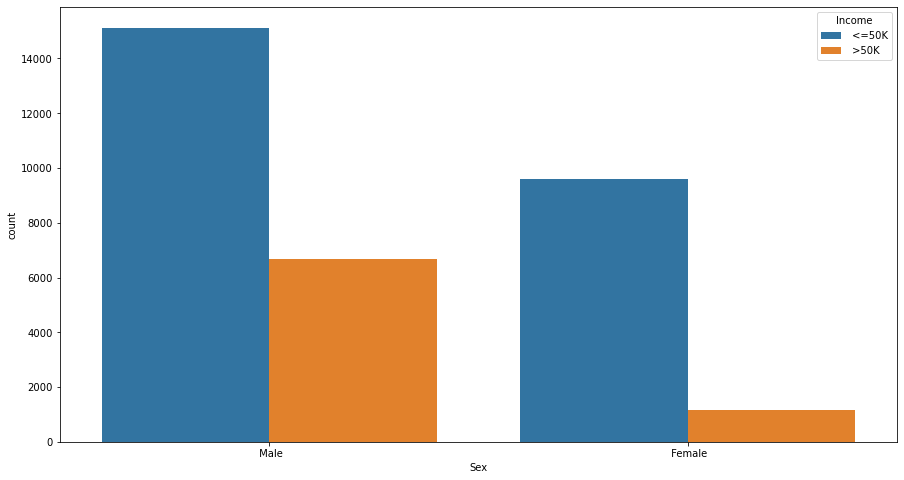

In [263]:
plt.figure(figsize=(15,8),)
sns.countplot(x='Sex',hue='Income', data = df)

As shown in above plot Male has larger proportion of income if compare with female

In [264]:
label_encoder=LabelEncoder()
df['Income']=label_encoder.fit_transform(df['Income'])
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,Adult,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,Adult,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,Old,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4,Adult,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,Adult,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,Adult,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,Old,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,Young,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [265]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

Data Manipulation

In [266]:
y=df['Income']
x=df.drop('Income',axis=1)
x= pd.get_dummies(x)
print("Total features: {}".format(x.shape[1]))

Total features: 107


train_test_split

In [267]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=0)

In [268]:
x_train.head()

,Education_num,Hours_per_week,Age_Young,Age_Adult,Age_Old,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
1816,9,40,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29912,10,10,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
24722,10,45,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
31902,14,40,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21776,10,40,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [269]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [270]:
rf.score(x_train,y_train)

0.9339066339066339

Predicting for x_test

In [271]:
pred=rf.predict(x_test)

In [272]:
accuracy_score(y_test,pred)

0.8150696150696151